In [141]:
from sklearn.model_selection import train_test_split

import datetime
import pandas as pd
from pandas.plotting import bootstrap_plot
import numpy as np

import panel as pn
pn.extension('tabulator', sizing_mode="stretch_width")

import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from catboost import CatBoostRegressor, CatBoostClassifier

from sklearn.model_selection import *
from sklearn.metrics import *

pd.options.display.float_format = "{:.1f}".format
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 

import warnings
warnings.filterwarnings("ignore")

In [142]:
# for non-scientific output of floats
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [143]:
pd.set_option('display.max_columns', None)

In [144]:
def environment():
    try:
        get_ipython()
        return "notebook"
    except:
        return "server"
environment()


'notebook'

In [145]:
PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0", ]
pn.Row(
    pn.layout.HSpacer(height=50, background=PALETTE[0]),
    pn.layout.HSpacer(height=50, background=PALETTE[1]),
    pn.layout.HSpacer(height=50, background=PALETTE[2]),
)

Row(sizing_mode='stretch_width')
    [0] HSpacer(background='#ff6f69', height=50)
    [1] HSpacer(background='#ffcc5c', height=50)
    [2] HSpacer(background='#88d8b0', height=50)

In [146]:
#!cp ../../data/form_m1.xlsx .

# Reading data

In [147]:
path = 'form_m1.xlsx'

In [148]:
form_m1 = pd.read_excel(path, sheet_name=None)

In [149]:
xls = pd.ExcelFile(path)

In [150]:
# Открыть листы Р1, Р2, Р3, Р4, Р5, Р6, Р7 и сохранить их в виде датафрейма с названиями r1, r2 и тд
# Открыть листы Раздел 1, Раздел 2 и тд и сохранить их в датафреймы с названиями razdel_1, razdel_2 и тд
data_numbers = [1, 2, 3, 4, 5, 6, 7]
for i in data_numbers:
    globals()['r'+str(i)] = pd.read_excel(xls, f'Р{i}')
    try:
        globals()['razdel_'+str(i)] = pd.read_excel(xls, f'Раздел {i}')
    except:
        globals()['razdel_'+str(i)] = pd.read_excel(xls, f'Раздел{i}')

In [151]:
# Открыть листы Р2-4 и статистика по годам
r4_2 = pd.read_excel(xls, 'Р4-2')
statistics_by_years = pd.read_excel(xls, 'статистика по годам')

In [152]:
r1 = r1.iloc[:, :-2]

# Data manipulation

In [153]:
statistics_by_years.head()

,Unnamed: 0,Unnamed: 1,2016,2017,2018,2019,2020,2021
0,70.1.1.25.07.2016,Объем финансирования молодежной политики из бю...,5741811940.620,8706357899.750,11932240504.810,12683307462.965,17098236760.000,18818101388.000
1,70.1.2.25.07.2016,Объем финансирования молодежной политики из бю...,3490962163.450,3931433665.890,4983470393.960,9673718706.726,18976777431.000,17790935446.000
2,70.1.3.25.07.2016,"Количество грантов, выданных физическим и юрид...",6388.000,6155.000,9427.000,10270.000,16918.000,14229.000
3,70.1.4.25.07.2016,"Объем грантовых средств, выданных физическим и...",1135347690.930,555641507.180,3017922584.000,5777856093.000,5902433910.000,4775506810.000
4,70.1.5.25.07.2016,Количество региональных общественных объединен...,1618.000,1052.000,1283.000,4915.000,4690.000,1158.000


In [154]:
grouped_r1_region = pd.DataFrame(r1.groupby('Регион')['Кол-во грантов'].sum())

In [155]:
whole_sum = r1['Кол-во грантов'].sum()

In [156]:
grouped_r1_region['Кол-во грантов по стране'] = whole_sum
grouped_r1_region

,Кол-во грантов,Кол-во грантов по стране
Регион,,
Алтайский край,70.000,14229.000
Амурская область,19.000,14229.000
Архангельская область,240.000,14229.000
Астраханская область,30.000,14229.000
Белгородская область,66.000,14229.000
...,...,...
Чеченская Республика,0.000,14229.000
Чувашская Республика,29.000,14229.000
Чукотский автономный округ,29.000,14229.000


In [157]:
grouped_r1_region['Доля грантов по стране (%)'] = grouped_r1_region['Кол-во грантов'] * 100 / grouped_r1_region['Кол-во грантов по стране']

In [158]:
grouped_r1_region = grouped_r1_region.drop(columns='Кол-во грантов по стране')

In [159]:
# autocomplete input

In [160]:
autocomplete_region = pn.widgets.AutocompleteInput(
        name='Автозаполнение для региона', options=list(grouped_r1_region.reset_index()['Регион']),
        placeholder='Название региона...')


In [161]:
idf = grouped_r1_region.reset_index().interactive()

In [162]:
grouped_pipeline = idf[idf['Регион'] == autocomplete_region]

In [163]:
grouped_pipeline.hvplot.line()

In [164]:
statistics_by_years.head()

,Unnamed: 0,Unnamed: 1,2016,2017,2018,2019,2020,2021
0,70.1.1.25.07.2016,Объем финансирования молодежной политики из бю...,5741811940.620,8706357899.750,11932240504.810,12683307462.965,17098236760.000,18818101388.000
1,70.1.2.25.07.2016,Объем финансирования молодежной политики из бю...,3490962163.450,3931433665.890,4983470393.960,9673718706.726,18976777431.000,17790935446.000
2,70.1.3.25.07.2016,"Количество грантов, выданных физическим и юрид...",6388.000,6155.000,9427.000,10270.000,16918.000,14229.000
3,70.1.4.25.07.2016,"Объем грантовых средств, выданных физическим и...",1135347690.930,555641507.180,3017922584.000,5777856093.000,5902433910.000,4775506810.000
4,70.1.5.25.07.2016,Количество региональных общественных объединен...,1618.000,1052.000,1283.000,4915.000,4690.000,1158.000


In [165]:
# обработка данных
statistics_by_years = statistics_by_years.drop(columns=['Unnamed: 0'])

In [166]:
statistics_by_years.head()

,Unnamed: 1,2016,2017,2018,2019,2020,2021
0,Объем финансирования молодежной политики из бю...,5741811940.620,8706357899.750,11932240504.810,12683307462.965,17098236760.000,18818101388.000
1,Объем финансирования молодежной политики из бю...,3490962163.450,3931433665.890,4983470393.960,9673718706.726,18976777431.000,17790935446.000
2,"Количество грантов, выданных физическим и юрид...",6388.000,6155.000,9427.000,10270.000,16918.000,14229.000
3,"Объем грантовых средств, выданных физическим и...",1135347690.930,555641507.180,3017922584.000,5777856093.000,5902433910.000,4775506810.000
4,Количество региональных общественных объединен...,1618.000,1052.000,1283.000,4915.000,4690.000,1158.000


In [167]:
# transpose table
statistics_by_years_transpose = statistics_by_years.transpose().rename(index={'Unnamed: 1' : 'Год'}).reset_index()

In [168]:
#hvplot.help('line')

In [169]:
statistics_by_years_transpose

,index,0,1,2,3,4,5,6,7,8,9,10
0,Год,Объем финансирования молодежной политики из бю...,Объем финансирования молодежной политики из бю...,"Количество грантов, выданных физическим и юрид...","Объем грантовых средств, выданных физическим и...",Количество региональных общественных объединен...,"Количество местных общественных объединений, п...",Количество органов молодежного самоуправления,"Количество молодежных форумов, прошедших на те...",Численность участников молодежных форумов,Объем финансирования молодежных форумов из сре...,Объем финансирования молодежных форумов из сре...
1,2016,5741811940.620,3490962163.450,6388.000,1135347690.930,1618.000,3424.000,3783.000,1553.000,359168.000,792801046.300,68733327.070
2,2017,8706357899.750,3931433665.890,6155.000,555641507.180,1052.000,3596.000,5029.000,2455.000,515215.000,903272865.580,92695846.190
3,2018,11932240504.810,4983470393.960,9427.000,3017922584.000,1283.000,3375.000,5025.000,2988.000,902253.000,1111146166.400,94945874.760
4,2019,12683307462.965,9673718706.726,10270.000,5777856093.000,4915.000,4055.000,4681.000,2976.000,1015072.000,1275998738.400,125336343.450
5,2020,17098236760.000,18976777431.000,16918.000,5902433910.000,4690.000,4319.000,4473.000,1865.000,650397.000,901324090.240,52107526.260
6,2021,18818101388.000,17790935446.000,14229.000,4775506810.000,1158.000,4128.000,4345.000,2091.000,1378033.000,1154433140.800,121804064.500


In [170]:
# converting column names
statistics_by_years_transpose.columns = statistics_by_years_transpose.iloc[0]

In [171]:
statistics_by_years_transpose = statistics_by_years_transpose[1:]

In [172]:
statistics_by_years_transpose

,Год,Объем финансирования молодежной политики из бюджета субъектов Российской Федерации,Объем финансирования молодежной политики из бюджета органов местного самоуправления,"Количество грантов, выданных физическим и юридическим лицам, в рамках реализации государственной молодежной политики","Объем грантовых средств, выданных физическим и юридическим лицам, в рамках реализации государственной молодежной политики","Количество региональных общественных объединений, пользующихся государственной поддержкой","Количество местных общественных объединений, пользующихся поддержкой",Количество органов молодежного самоуправления,"Количество молодежных форумов, прошедших на территории субъектов Российской Федерации",Численность участников молодежных форумов,Объем финансирования молодежных форумов из средств бюджетов субъектов Российской Федерации,Объем финансирования молодежных форумов из средств органов бюджетов местного самоуправления
1,2016,5741811940.620,3490962163.450,6388.000,1135347690.930,1618.000,3424.000,3783.000,1553.000,359168.000,792801046.300,68733327.070
2,2017,8706357899.750,3931433665.890,6155.000,555641507.180,1052.000,3596.000,5029.000,2455.000,515215.000,903272865.580,92695846.190
3,2018,11932240504.810,4983470393.960,9427.000,3017922584.000,1283.000,3375.000,5025.000,2988.000,902253.000,1111146166.400,94945874.760
4,2019,12683307462.965,9673718706.726,10270.000,5777856093.000,4915.000,4055.000,4681.000,2976.000,1015072.000,1275998738.400,125336343.450
5,2020,17098236760.000,18976777431.000,16918.000,5902433910.000,4690.000,4319.000,4473.000,1865.000,650397.000,901324090.240,52107526.260
6,2021,18818101388.000,17790935446.000,14229.000,4775506810.000,1158.000,4128.000,4345.000,2091.000,1378033.000,1154433140.800,121804064.500


In [173]:
statistics_by_years

,Unnamed: 1,2016,2017,2018,2019,2020,2021
0,Объем финансирования молодежной политики из бю...,5741811940.620,8706357899.750,11932240504.810,12683307462.965,17098236760.000,18818101388.000
1,Объем финансирования молодежной политики из бю...,3490962163.450,3931433665.890,4983470393.960,9673718706.726,18976777431.000,17790935446.000
2,"Количество грантов, выданных физическим и юрид...",6388.000,6155.000,9427.000,10270.000,16918.000,14229.000
3,"Объем грантовых средств, выданных физическим и...",1135347690.930,555641507.180,3017922584.000,5777856093.000,5902433910.000,4775506810.000
4,Количество региональных общественных объединен...,1618.000,1052.000,1283.000,4915.000,4690.000,1158.000
5,"Количество местных общественных объединений, п...",3424.000,3596.000,3375.000,4055.000,4319.000,4128.000
6,Количество органов молодежного самоуправления,3783.000,5029.000,5025.000,4681.000,4473.000,4345.000
7,"Количество молодежных форумов, прошедших на те...",1553.000,2455.000,2988.000,2976.000,1865.000,2091.000
8,Численность участников молодежных форумов,359168.000,515215.000,902253.000,1015072.000,650397.000,1378033.000
9,Объем финансирования молодежных форумов из сре...,792801046.300,903272865.580,1111146166.400,1275998738.400,901324090.240,1154433140.800


In [174]:
#statistics_by_years_transpose['Год'] = statistics_by_years_transpose['Год'].astype('int')

In [175]:
#min_year, max_year = statistics_by_years_transpose['Год'].min(), statistics_by_years_transpose['Год'].max()

In [176]:
# year slider
#year_slider = pn.widgets.IntSlider(
#    name='Год',
#    start=2016, end=2021, value=2016, step=1)
#
#year_slider

In [177]:
years_list = list(statistics_by_years_transpose['Год'])

In [178]:
multi_select_year = pn.widgets.MultiSelect(name='Выберите нужные года', options=years_list, size=len(years_list))


In [179]:
new_labels = [
    'Год',
    'Объем ФМП СРФ',
    'Объем ФМП МО',
    'Кол-во грантов для физ и юрлиц',
    'Объем грантов для физ и юрлиц',
    'Кол-во РОО',
    'Кол-во МОО',
    'Кол-во МС',
    'Кол-во молод. форумов',
    'Число участн.',
    'Объем ФМФ СРФ',
    'Объем ФМФ МО']

In [180]:
statistics_by_years_transpose.columns = new_labels

In [181]:
idf = statistics_by_years_transpose.interactive()

In [182]:
stat_pipeline = idf[idf['Год'].isin(multi_select_year)]

In [183]:
ans_plot_2_table = stat_pipeline.pipe(pn.widgets.Tabulator, layout='fit_data', pagination='remote', page_size=10)

In [184]:
ans_plot_2_table

In [185]:
ans_plot_2 = stat_pipeline.hvplot.line(x='Год', y=new_labels[1:],
                                          value_label='Объем', legend='top_right', height=650, width=1000, 
                                          title='Статистика по годам', fontsize={'legend' : '7pt'})

In [186]:
ans_plot_2

In [187]:
idf = grouped_r1_region.interactive()

In [188]:
ipipeline = idf.pipe(pn.widgets.Tabulator, pagination='remote', page_size=30)

In [189]:
#ipipeline  # уже в ответе

In [190]:
#Cоотношение рег и муниц структур по региону

In [191]:
select_region = pn.widgets.Select(name='Выбор региона', options=list(r2['Регион'].unique()))

In [192]:
# Добавить столбцы доли расходов в % 
r2['Доля расходов на мер-я, %'] = r2['Расходы на мероприятия'] / r2['Всего объeм финансирования, руб'] * 100

In [193]:
# удалить из r2  строки с маленькой буквы
r2['Заглавная'] = r2['Наименование'].str.count(r'[А-Я]')

In [194]:
r2 = r2[r2['Заглавная']==1]

In [195]:
r2['Регион/муниц структуры'] = r2['Наименование'].str.contains('Региональные').astype(int)

In [196]:
r2['Регион/муниц структуры'][r2['Регион/муниц структуры']==1] = 'Региональные'
r2['Регион/муниц структуры'][r2['Регион/муниц структуры']==0] = 'Муниципальные'
r2.index = r2['Регион/муниц структуры']

In [197]:
r2 = r2.drop(columns=['№ строки'])

In [198]:
idf = r2.interactive()

In [199]:
i_pipeline = idf[(idf['Регион']==select_region)]['Кол-во структур, ед']

In [200]:
ans_3_1 = idf.hvplot.scatter(title='Сводный график по всем регионам', height=500)

In [201]:
ans_3_1

In [202]:
#hvplot.help('bar')

In [203]:
ans_3_2 = i_pipeline.hvplot.bar(color='#ff9999', height=500) + i_pipeline.hvplot(color='#ffb266', height=500)

In [204]:
ans_3_2

In [205]:
#End analytics graph block

In [206]:
df_p1   = form_m1['Р1']
df_pp1  = form_m1['Раздел 1']

In [207]:
# data preprocessing

In [208]:
df_p1.head()

,Регион,Округ,Год,Направления реализации государственной молодeжной политики,№ строки,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному",Unnamed: 11,Unnamed: 12
0,Алтайский край,СФО,2021,Вовлечение молодeжи в инновационную деятельнос...,1,7176890.000,123085.000,4.000,35485.000,3845.000,44.000,NaN,NaN
1,Алтайский край,СФО,2021,биомедицина,2,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN
2,Алтайский край,СФО,2021,промышленные технологии\n (нанотехн...,3,0.000,0.000,0.000,0.000,10.000,0.000,NaN,NaN
3,Алтайский край,СФО,2021,аэрокосмос,4,0.000,0.000,0.000,0.000,28.000,1.000,NaN,NaN
4,Алтайский край,СФО,2021,сельское хозяйство,5,0.000,1000.000,0.000,0.000,247.000,0.000,NaN,NaN


In [209]:
df_p1.shape

(2295, 13)

In [210]:
df_p1 = df_p1.drop(columns=['Unnamed: 11', 'Unnamed: 12'])

In [211]:
df_p1.dtypes

Регион                                                                               object
Округ                                                                                object
Год                                                                                   int64
Направления реализации государственной молодeжной политики                           object
№ строки                                                                              int64
Бюджет СРФ, руб                                                                     float64
Бюджет МО, руб                                                                      float64
Кол-во грантов                                                                      float64
Бюджет грантов, руб                                                                 float64
Численность молодeжи, задействованной в программных мероприятиях по направлению     float64
Количество детских и молодeжных общественных объединений, работающих по данному 

In [212]:
df_p1.isna().sum()

Регион                                                                                0
Округ                                                                                 0
Год                                                                                   0
Направления реализации государственной молодeжной политики                            0
№ строки                                                                              0
Бюджет СРФ, руб                                                                     385
Бюджет МО, руб                                                                      306
Кол-во грантов                                                                      442
Бюджет грантов, руб                                                                 449
Численность молодeжи, задействованной в программных мероприятиях по направлению     147
Количество детских и молодeжных общественных объединений, работающих по данному     422
dtype: int64

In [213]:
# Расходы по разным направлениям с выбором округа (одиночный или множественный)

In [214]:
df_p1 = df_p1.fillna(0)

In [215]:
df_p1.head()

,Регион,Округ,Год,Направления реализации государственной молодeжной политики,№ строки,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному"
0,Алтайский край,СФО,2021,Вовлечение молодeжи в инновационную деятельнос...,1,7176890.000,123085.000,4.000,35485.000,3845.000,44.000
1,Алтайский край,СФО,2021,биомедицина,2,0.000,0.000,0.000,0.000,0.000,0.000
2,Алтайский край,СФО,2021,промышленные технологии\n (нанотехн...,3,0.000,0.000,0.000,0.000,10.000,0.000
3,Алтайский край,СФО,2021,аэрокосмос,4,0.000,0.000,0.000,0.000,28.000,1.000
4,Алтайский край,СФО,2021,сельское хозяйство,5,0.000,1000.000,0.000,0.000,247.000,0.000


In [216]:
df_p1['Год'].dtype

dtype('int64')

In [217]:
districts = list(df_p1['Округ'].unique())

In [218]:
districts

['СФО', 'ДФО', 'СЗФО', 'ЮФО', 'ЦФО', 'СКФО', 'ПФО', 'УФО']

In [219]:
# multiple choice buttons
districts_buttons = pn.widgets.ToggleGroup(
                        name='dstr_btn',
                        options=districts,
                        value=[districts],
                        button_type='success'
                    )

In [220]:
idf.columns

In [221]:
df_p1 = df_p1.rename(columns={ 'Направления реализации государственной молодeжной политики'                        : 'Направление',
                       'Численность молодeжи, задействованной в программных мероприятиях по направлению'   : 'Число молодежи',
                       'Количество детских и молодeжных общественных объединений, работающих по данному '  : 'Кол-во объединений'})

In [222]:
# make interactive dataframe
idf = df_p1.interactive()

In [223]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=2020, end=2021, step=1, value=2020)


In [224]:
ipipeline_1_1 = idf[(idf['Округ'].isin(districts_buttons)) & (idf['Год'] <= year_slider)].agg({   'Бюджет СРФ, руб': 'sum',
                         'Бюджет МО, руб': 'sum',
                         'Кол-во грантов': 'sum',
                         'Бюджет грантов, руб': 'sum',
                         'Число молодежи': 'sum',
                         'Кол-во объединений': 'sum'}).sort_values(0, ascending=True)

In [225]:
ans_plot_4 = ipipeline_1_1.sort_values(0, ascending=True).hvplot.bar(color='#ff6666')

In [226]:
ans_plot_4

In [227]:
# add select button
#select = pn.widgets.Select(name='Выберите округ', options=districts)

In [228]:
#itable_2 = ipipeline_2.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10)

In [229]:
#itable_2

In [230]:
# график расходов по округам с выбором типа бюджета

In [231]:
budget_types=sorted(list(df_p1.columns[5:9]))[:3]

In [232]:
budget_types

['Бюджет МО, руб', 'Бюджет СРФ, руб', 'Бюджет грантов, руб']

In [233]:
# create budget selection 
select_budget = pn.widgets.Select(name='Выберите тип бюджета', options=budget_types)

In [234]:
idf = df_p1.interactive()

In [235]:
idf.head()

In [236]:
ipipline_3 = idf.groupby('Округ', as_index=True).agg({select_budget : 'sum'})

In [237]:
ihvplot = ipipline_3.hvplot(x='Округ', y=select_budget, color=PALETTE)

In [238]:
ans_plot_5 = ans_plot_4 + ihvplot

In [239]:
ans_plot_5

### Интерактивный раздел 1

In [240]:
#df_pp1 = form_m1['Раздел 1']

In [241]:
#list(df_pp1.iloc[3])

In [242]:
#df_pp1.columns = list(df_pp1.iloc[3])#

In [243]:
#df_pp1 = df_pp1[4:].rename(columns={'Названия строк' : 'Направления'})

In [244]:
#df_pp1.head()

In [245]:
#df_pp1 = df_pp1.set_index('Направления').head()

In [246]:
#idf = df_pp1.interactive()

In [247]:
#ipipeline_3 = idf

In [248]:
# make interactive table
#pp1_pipeline = ipipeline_3.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 

In [249]:
#pp1_pipeline

### Р6

In [250]:
#df_p6 = form_m1['Р6']

In [251]:
#df_p6.isna().sum()

In [252]:
#df_p6 = df_p6.fillna(0)

In [253]:
#Будем считать, что запуск форума был удачным и его можно повторно запустить, если на него пришло много человек

In [254]:
#df_p6.head(3)

In [255]:
#idf = df_p6.interactive()

In [256]:
#iscatter_select = pn.widgets.Select(name='Выбор форума', options=list(df_p6['Наименование'].unique())[:4])

In [257]:
# топ-10 по численности
#iscatter = idf[idf['Наименование'] == iscatter_select] \
#            .groupby('Регион', as_index=True) \
#            .agg({'Численность участников форумов соответствующего уровня, чел' : 'sum'}) \
#            .rename(columns={'Численность участников форумов соответствующего уровня, чел' : 'Кол-во участников'}) \
#            .sort_values('Кол-во участников', ascending=False) \
#            .head(10)

In [258]:
#hvplot.help('scatter', generic=False, style=False)

In [259]:
#iscatter_plot = iscatter.hvplot.scatter(x='Регион', y='Кол-во участников', 
#                 legend='top', height=800, width=1400, title=iscatter_select)

In [260]:
#iscatter_plot

# Models catboost

In [261]:
P1 = form_m1['Р1']

In [262]:
P1 = P1.drop('Unnamed: 11', axis=1)

In [263]:
P1 = P1.drop('Unnamed: 12', axis=1)

In [264]:
P1 = P1.drop('№ строки', axis=1)

In [265]:
df = P1

In [266]:
df = df.fillna(0)

In [267]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features

['Регион',
 'Округ',
 'Направления реализации государственной молодeжной политики']

### Преобразованиие данных в X и y

In [268]:
X = df.drop(['Количество детских и молодeжных общественных объединений, работающих по данному '], axis=1)
y_regression = df['Количество детских и молодeжных общественных объединений, работающих по данному ']

## Обучение и тестирование моделей

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from catboost import CatBoostRegressor, CatBoostClassifier

from sklearn.model_selection import *
from sklearn.metrics import *

pd.options.display.float_format = "{:.1f}".format
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 

import warnings
warnings.filterwarnings("ignore")

### Подход №1: Регрессия

In [271]:
X_train, X_val, y_train, y_val = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [272]:
model_regression = CatBoostRegressor(
    verbose=100,
    cat_features=cat_features
)

model_regression.fit(X_train, y_train, eval_set=(X_val, y_val))

Learning rate set to 0.056018
0:	learn: 929.6415169	test: 879.2215631	best: 879.2215631 (0)	total: 7.98ms	remaining: 7.97s
100:	learn: 714.1821584	test: 863.8938694	best: 862.7996070 (74)	total: 142ms	remaining: 1.26s
200:	learn: 568.9023986	test: 867.0724713	best: 862.5310868 (120)	total: 249ms	remaining: 988ms
300:	learn: 415.9822076	test: 870.6408400	best: 862.5310868 (120)	total: 355ms	remaining: 824ms
400:	learn: 348.2948774	test: 874.6994197	best: 862.5310868 (120)	total: 464ms	remaining: 694ms
500:	learn: 306.8356715	test: 878.6161781	best: 862.5310868 (120)	total: 572ms	remaining: 570ms
600:	learn: 260.9969871	test: 888.8254703	best: 862.5310868 (120)	total: 687ms	remaining: 456ms
700:	learn: 241.9164157	test: 892.3683514	best: 862.5310868 (120)	total: 800ms	remaining: 341ms
800:	learn: 218.5141038	test: 897.0638050	best: 862.5310868 (120)	total: 918ms	remaining: 228ms
900:	learn: 205.5294980	test: 898.4634617	best: 862.5310868 (120)	total: 1.04s	remaining: 114ms
999:	learn: 19

In [273]:
preds_test_regression = model_regression.predict(X_val[model_regression.feature_names_])

# feature_importance

([<matplotlib.axis.YTick at 0x7f35b7a4a320>,
 [Text(0, 0, 'Год'),
  Text(0, 1, 'Бюджет СРФ, руб'),
  Text(0, 2, 'Округ'),
  Text(0, 3, 'Бюджет МО, руб'),
  Text(0, 4, 'Кол-во грантов'),
  Text(0, 5, 'Численность молодeжи, задействованной в программных мероприятиях по направлению'),
  Text(0, 6, 'Регион'),
  Text(0, 7, 'Бюджет грантов, руб'),
  Text(0, 8, 'Направления реализации государственной молодeжной политики')])

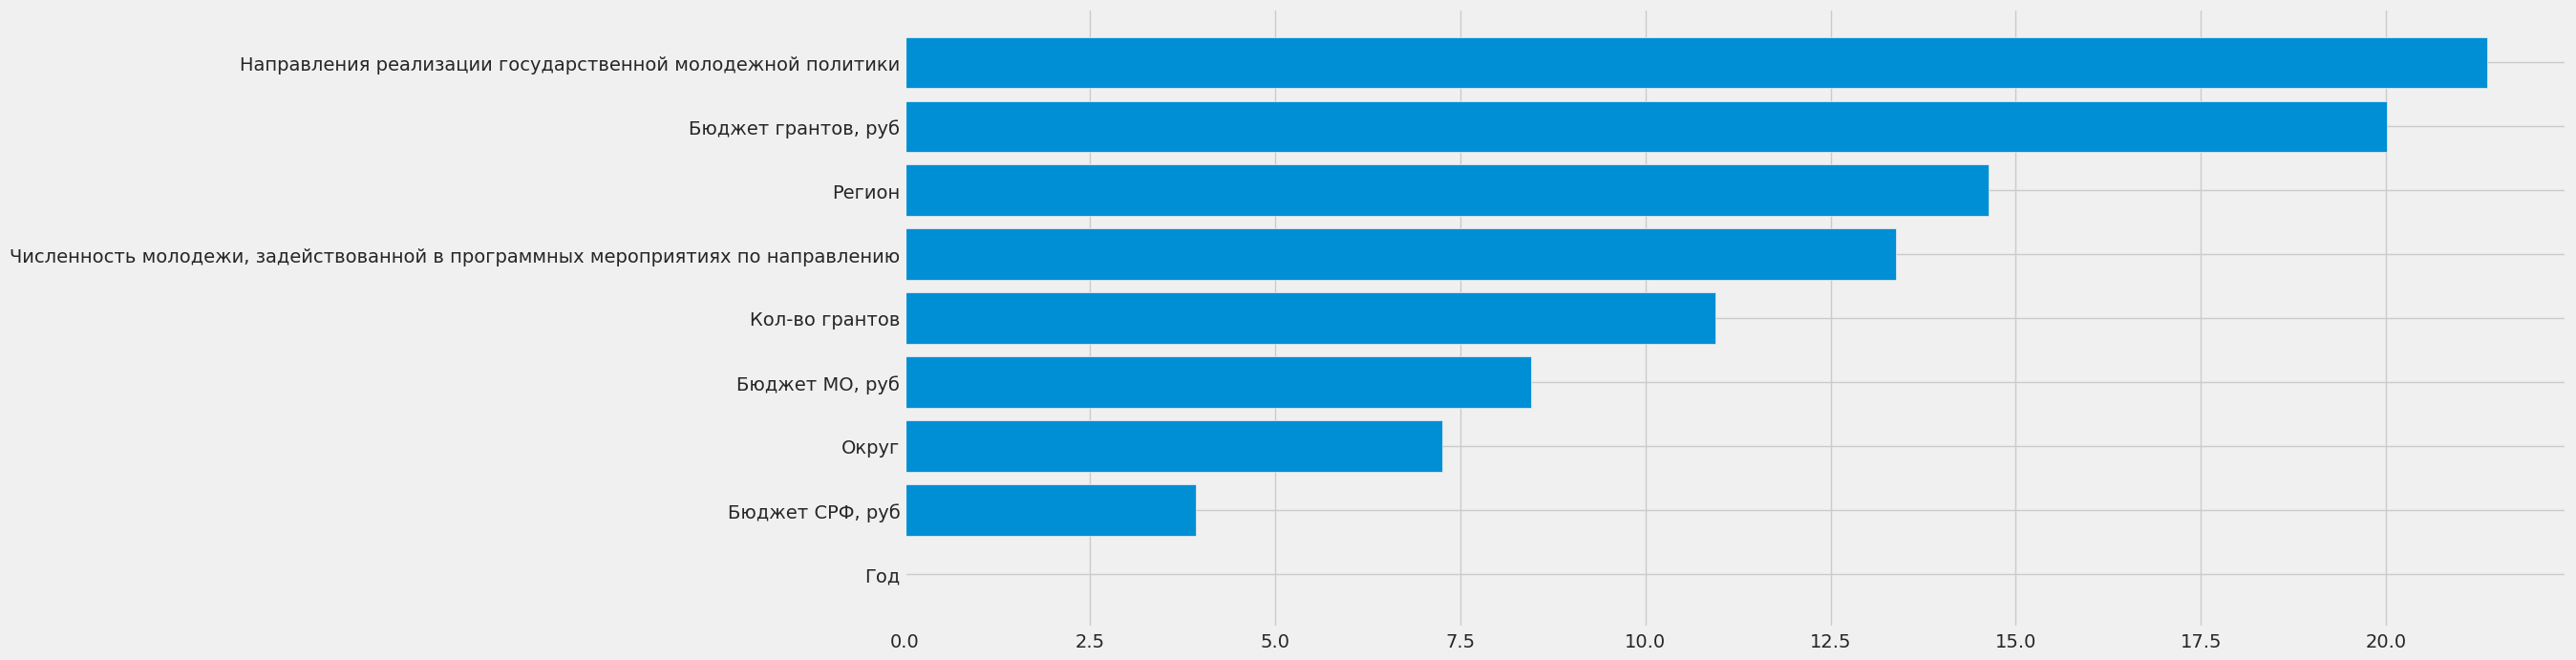

In [274]:
feature_importance = model_regression.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(20, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])

# Анализ

In [275]:
corr=df.corr()
corr

,Год,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному"
Год,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Бюджет СРФ, руб",NaN,1.0,0.1,0.0,0.1,0.2,0.0
"Бюджет МО, руб",NaN,0.1,1.0,0.0,0.0,0.3,0.1
Кол-во грантов,NaN,0.0,0.0,1.0,0.1,0.0,0.0
"Бюджет грантов, руб",NaN,0.1,0.0,0.1,1.0,0.1,0.0
"Численность молодeжи, задействованной в программных мероприятиях по направлению",NaN,0.2,0.3,0.0,0.1,1.0,0.1
"Количество детских и молодeжных общественных объединений, работающих по данному",NaN,0.0,0.1,0.0,0.0,0.1,1.0


<Axes: >

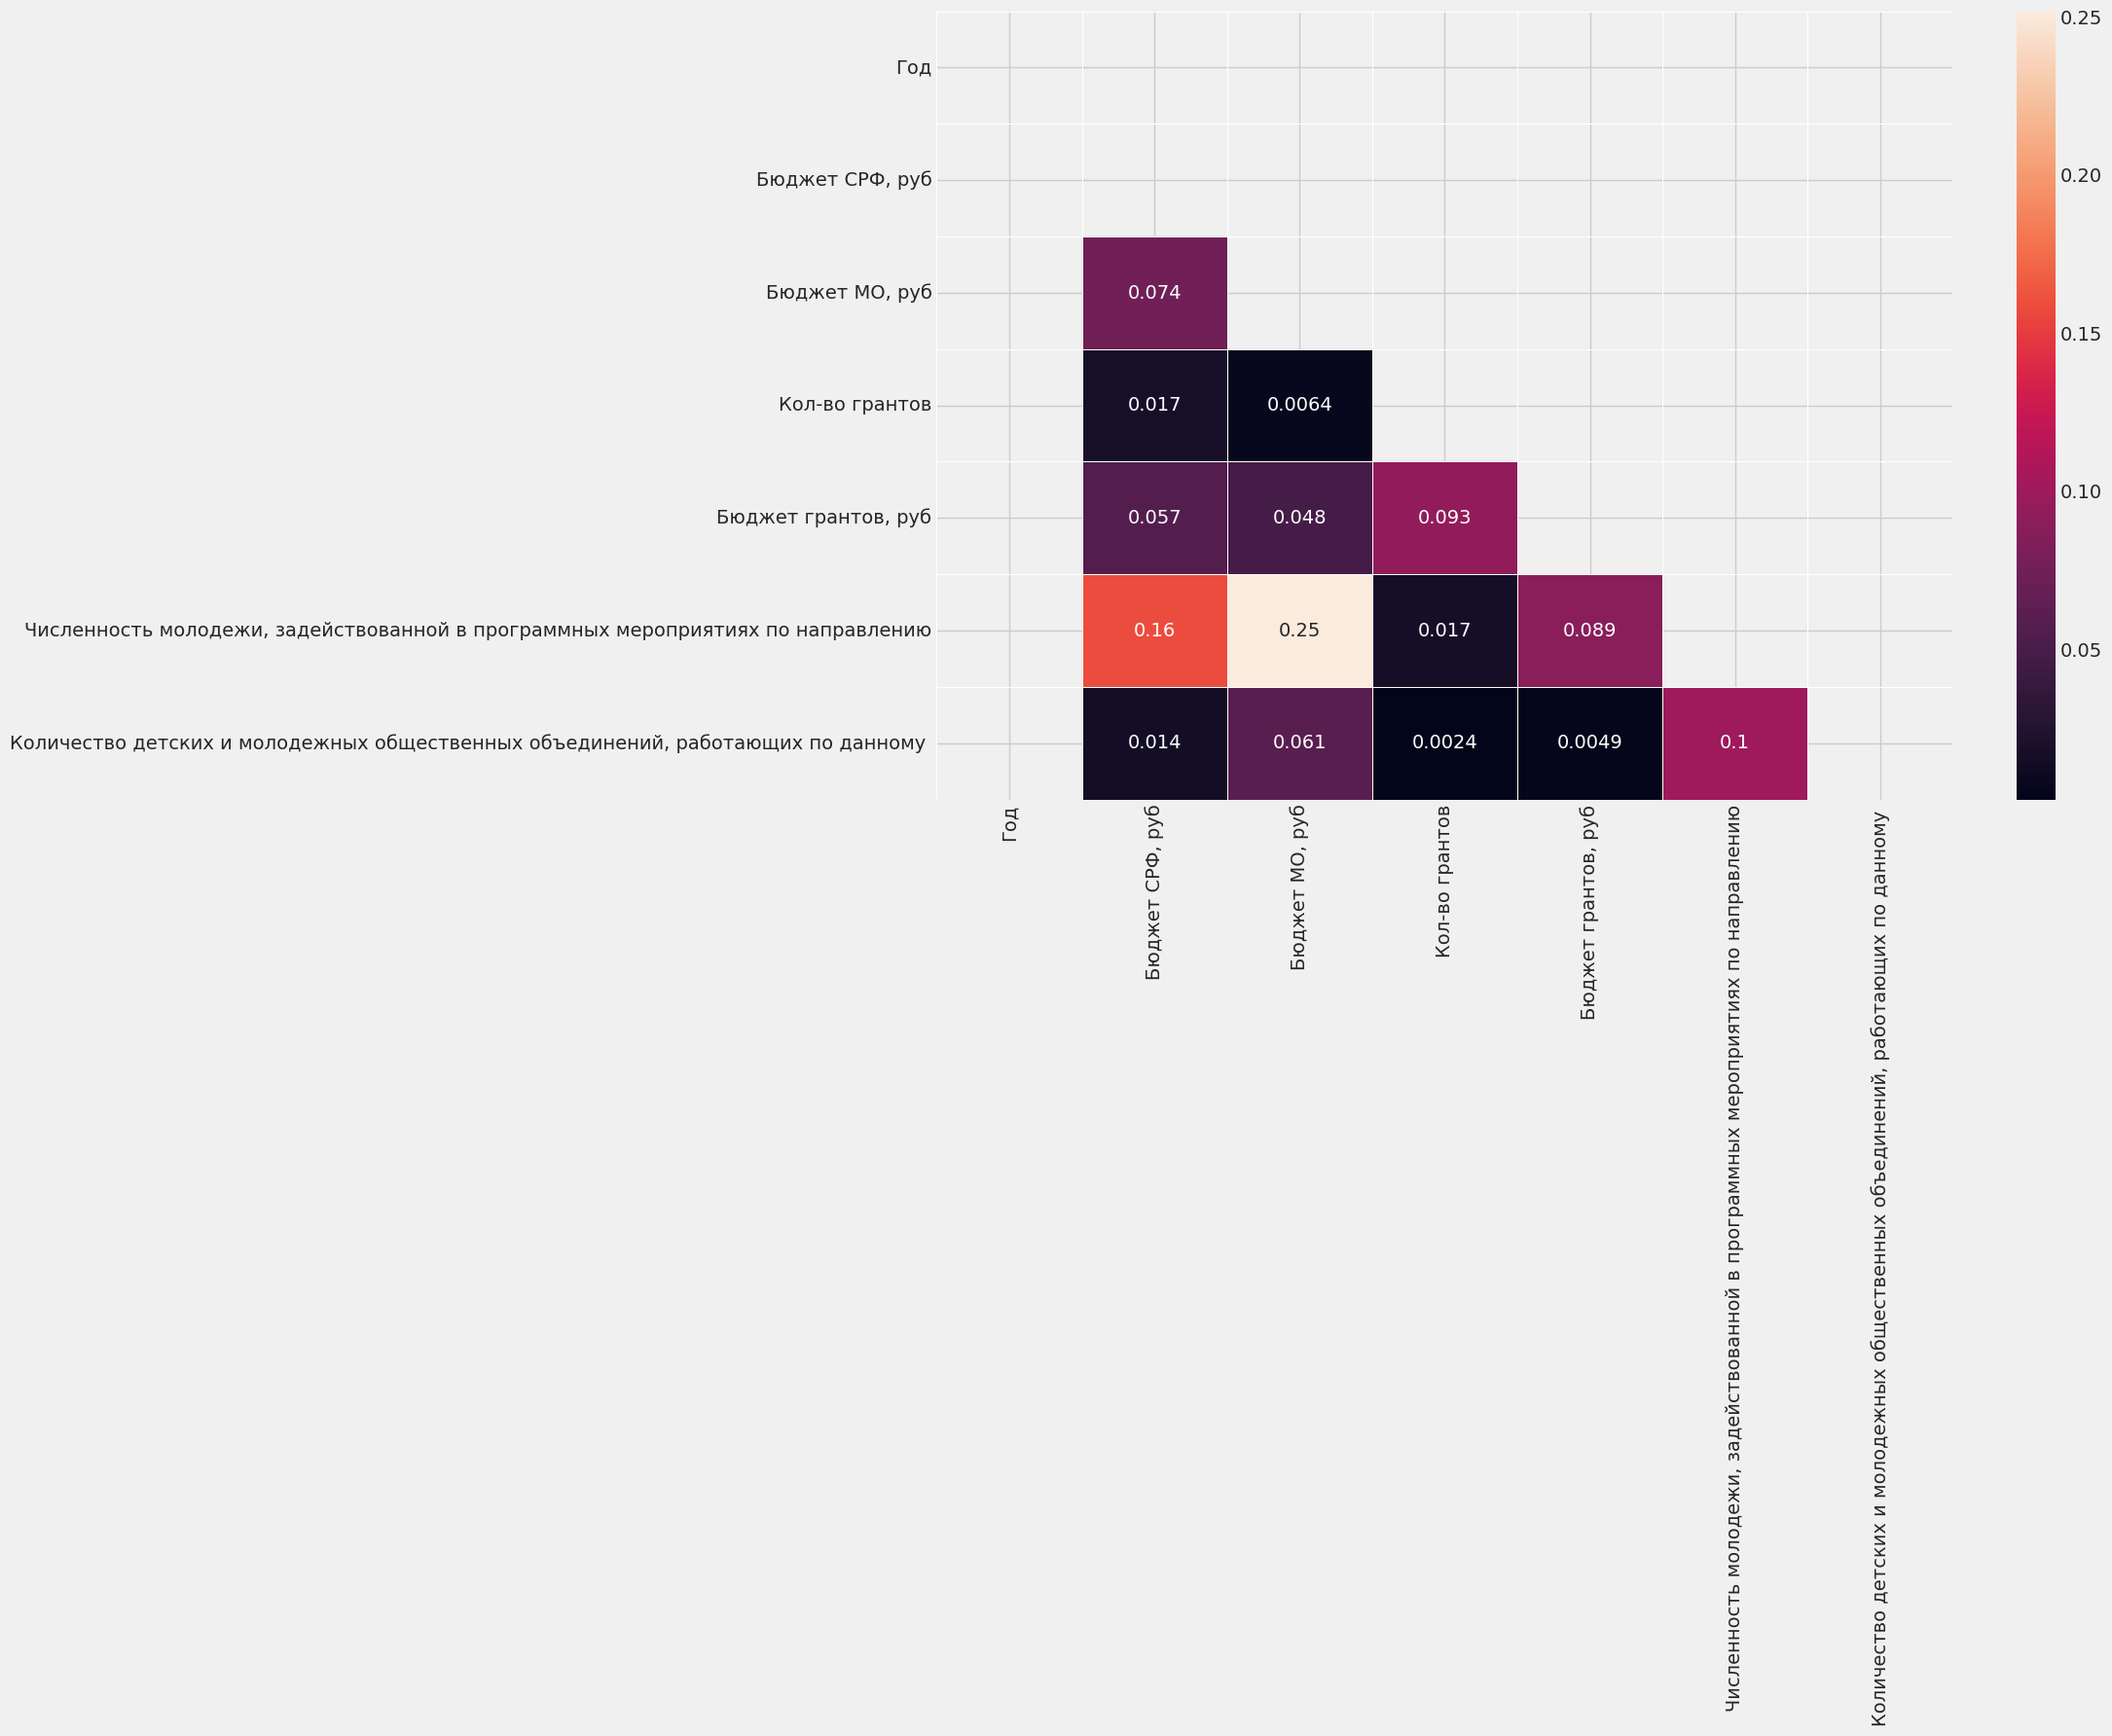

In [276]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, linewidths=.5,annot=True,mask=mask)

In [277]:
df.describe()

,Год,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному"
count,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0,2295.0
mean,2021.0,7518926.6,2266770.6,6.2,2080830.9,37561.1,126.8
std,0.0,54222180.2,14784797.4,120.8,24736296.8,114352.0,923.0
min,2021.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2021.0,0.0,0.0,0.0,0.0,280.0,0.0
50%,2021.0,105490.0,80865.0,0.0,0.0,4296.0,12.0
75%,2021.0,1857643.0,777091.0,2.0,499989.5,27394.0,78.0
max,2021.0,1418314800.0,537510446.0,5735.0,1135202650.0,2000265.0,34141.0


### Dashboard teset

In [278]:
template = pn.template.FastListTemplate(
    title='молодежный-бит хакатон', 
    sidebar=[pn.pane.Markdown("# Интерактивный дашборд-сервис"), 
             pn.pane.Markdown("### (на стадии разработки)"),
             pn.pane.Markdown("## Описание"),
             pn.pane.Markdown('Этот сервис поможет вам получать оперативные сводки и наблюдать динамику бизнес-процессов. Выстраивать иерархию данных и быстро проводить сравнение. Выделить ключевые для компании показатели и всегда держать их под контролем.'),
             pn.pane.Markdown('##Аббревиатуры'),
             pn.pane.Markdown("**ФМП** - финансирование молодежных политик\n\n**РОО** - региональных общественных объединений\n\n**МОО** - местных общественных объединений\n\n**МС** - молодежного самоуправления\n\n**ФМФ** - финансирования молодежных форумов")],
    main=[pn.Row(pn.Column(ans_plot_2)),
          pn.Row(pn.Column(ans_plot_2_table)),
          pn.Row(pn.Column(grouped_pipeline)),
          pn.Row(pn.Column(ans_3_1 + ans_3_2)),
          pn.Row(pn.Column(ans_plot_5)),
             pn.pane.Markdown("* Больше всего бюджета тратится на **СЗФО (7,2 млн)**. Меньше всего на **СКФО (470 тыс)**\n\n* В среднем человек на грант: больше всего - **СКФО (22 тыс)**, меньше всего - **ПФО (1860 тыс)**"),],
    accent_base_color="#66b2ff",
    header_background="#b266ff",
)
template.show()
#template.servable();

Launching server at http://localhost:34519
